In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset**

Link to dataset: [Individual Household Electric Power Consumption](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption)

This dataset is provided by the UC Irvine Machine Learning Repository. This dataset is licensed under a [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) (CC BY 4.0) license. This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

### **Description**

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

### **Feature Information**

- **Date**: Date in format dd/mm/yyyy
- **Time**: Time in format hh:mm:ss
- **Global Active Power**: Household global minute-averaged active power (in kilowatt)
- **Global Reactive Power**: Household global minute-averaged reactive power (in kilowatt)
- **Voltage**: Minute-averaged voltage (in volt)
- **Global Intensity**: Household global minute-averaged current intensity (in ampere)
- **Sub Metering 1**: Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- **Sub Metering 2**: Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- **Sub Metering 3**: Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
# import data
energy_data = pd.read_csv('data/household_power_consumption.txt', delimiter=';')
energy_data.head(10)

/tmp/ipykernel_63318/2750533921.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  energy_data = pd.read_csv('data/household_power_consumption.txt', delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


**First Glance Observations**

- Each row of seems to represent a snapshot of metering data every minute
- We start off on December 16th, 2006 at 5:24PM and increment 1 minute every row of data

## **Exploratory Data Analysis**

In [4]:
print(energy_data.iloc[0])
print(energy_data.iloc[-1])

Date                     16/12/2006
Time                       17:24:00
Global_active_power           4.216
Global_reactive_power         0.418
Voltage                     234.840
Global_intensity             18.400
Sub_metering_1                0.000
Sub_metering_2                1.000
Sub_metering_3                 17.0
Name: 0, dtype: object
Date                     26/11/2010
Time                       21:02:00
Global_active_power           0.932
Global_reactive_power           0.0
Voltage                      239.55
Global_intensity                3.8
Sub_metering_1                  0.0
Sub_metering_2                  0.0
Sub_metering_3                  0.0
Name: 2075258, dtype: object


Our data starts on December 16th, 2006 and ends on November 26th, 2010. We have approximately 4 years of data in this dataset.

In [5]:
print(f'Rows: {energy_data.shape[0]}')
print(f'Columns: {energy_data.shape[1]}')

Rows: 2075259
Columns: 9


In [6]:
print(energy_data.isnull().sum())

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


Aha! We see that all features don't have null values except for the last feature, Sub_metering_3. If we refer to the feature information at the top of this notebook, we can see that this feature corresponds to energy sub metering corresponding to an electric water-heater and an air-conditioner.

In [7]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Interesting, it makes sense that Date and Time are objects, but the rest of the data should be float values. Lets convert Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, and Sub_metering_2 to float values.

In [8]:
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for col in cols_to_convert:
    energy_data[col] = pd.to_numeric(energy_data[col], errors='coerce')

energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [9]:
energy_data.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Great, that looks a lot better. All of our features besides Date and Time are now float types.

In [10]:
energy_data.describe().round(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00,2049280.00
mean,1.09,0.12,240.84,4.63,1.12,1.30,6.46
std,1.06,0.11,3.24,4.44,6.15,5.82,8.44
min,0.08,0.00,223.20,0.20,0.00,0.00,0.00
25%,0.31,0.05,238.99,1.40,0.00,0.00,0.00
50%,0.60,0.10,241.01,2.60,0.00,0.00,1.00
75%,1.53,0.19,242.89,6.40,0.00,1.00,17.00
max,11.12,1.39,254.15,48.40,88.00,80.00,31.00


In [11]:
energy_data.describe(include='object')

,Date,Time
count,2075259,2075259
unique,1442,1440
top,25/11/2010,17:24:00
freq,1440,1442


In [12]:
print(f'Duplicate rows: {energy_data.duplicated().sum()}')

Duplicate rows: 0


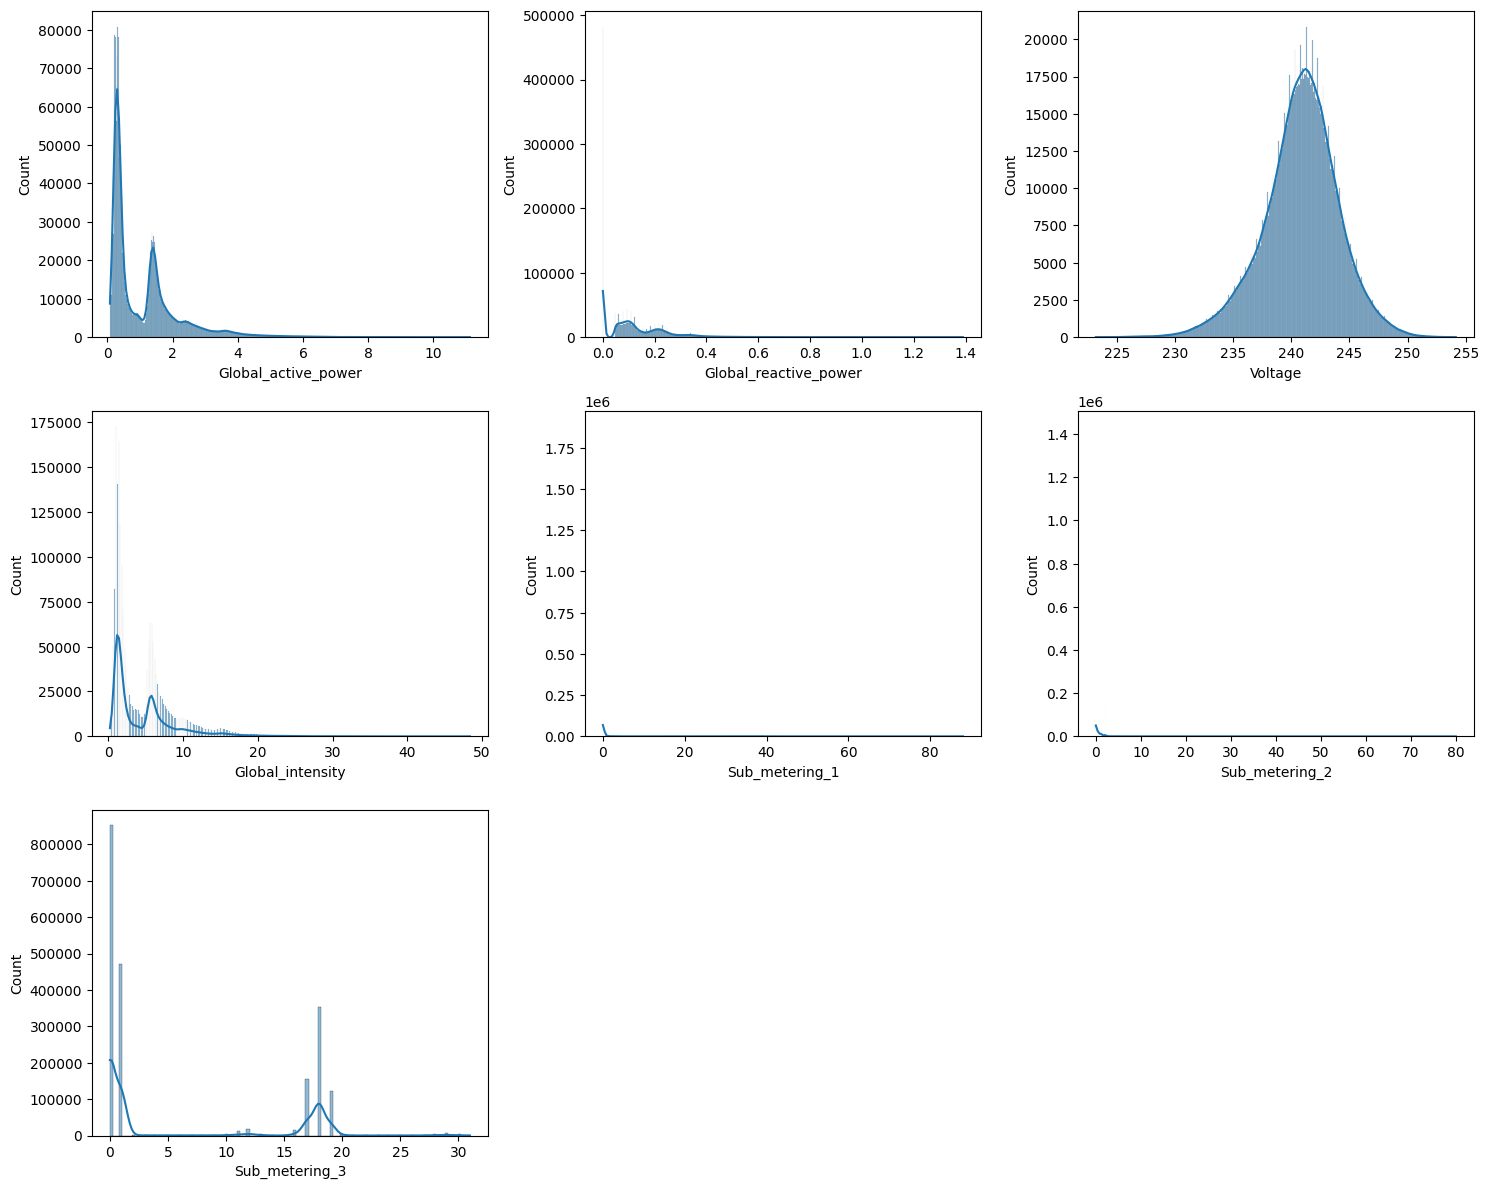

In [13]:
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i in range(len(cols)):
    row = i // 3
    col = i % 3
    sns.histplot(energy_data[cols[i]], kde=True, ax=axs[row, col])


axs[2, 1].axis('off')
axs[2, 2].axis('off')
plt.tight_layout()
plt.show()

We get some odd graphs here when plotting the distribution of each quantitative feature.

- **Global Active Power**: Most of the data is around 0.3-0.5, with another small peak at around 1.5.
- **Global Reactive Power**: Most data is at around 0.
- **Voltage**: Follows a normal distribution centered at around 242.
- **Global Intensity**: Most of the data is around 1-4.
- **Sub Metering 1**: Most of the data is about 0.
- **Sub Metering 2**: Most of the data is about 0.
- **Sub Metering 3**: One spike around 0-2 and another spike between 15-20.

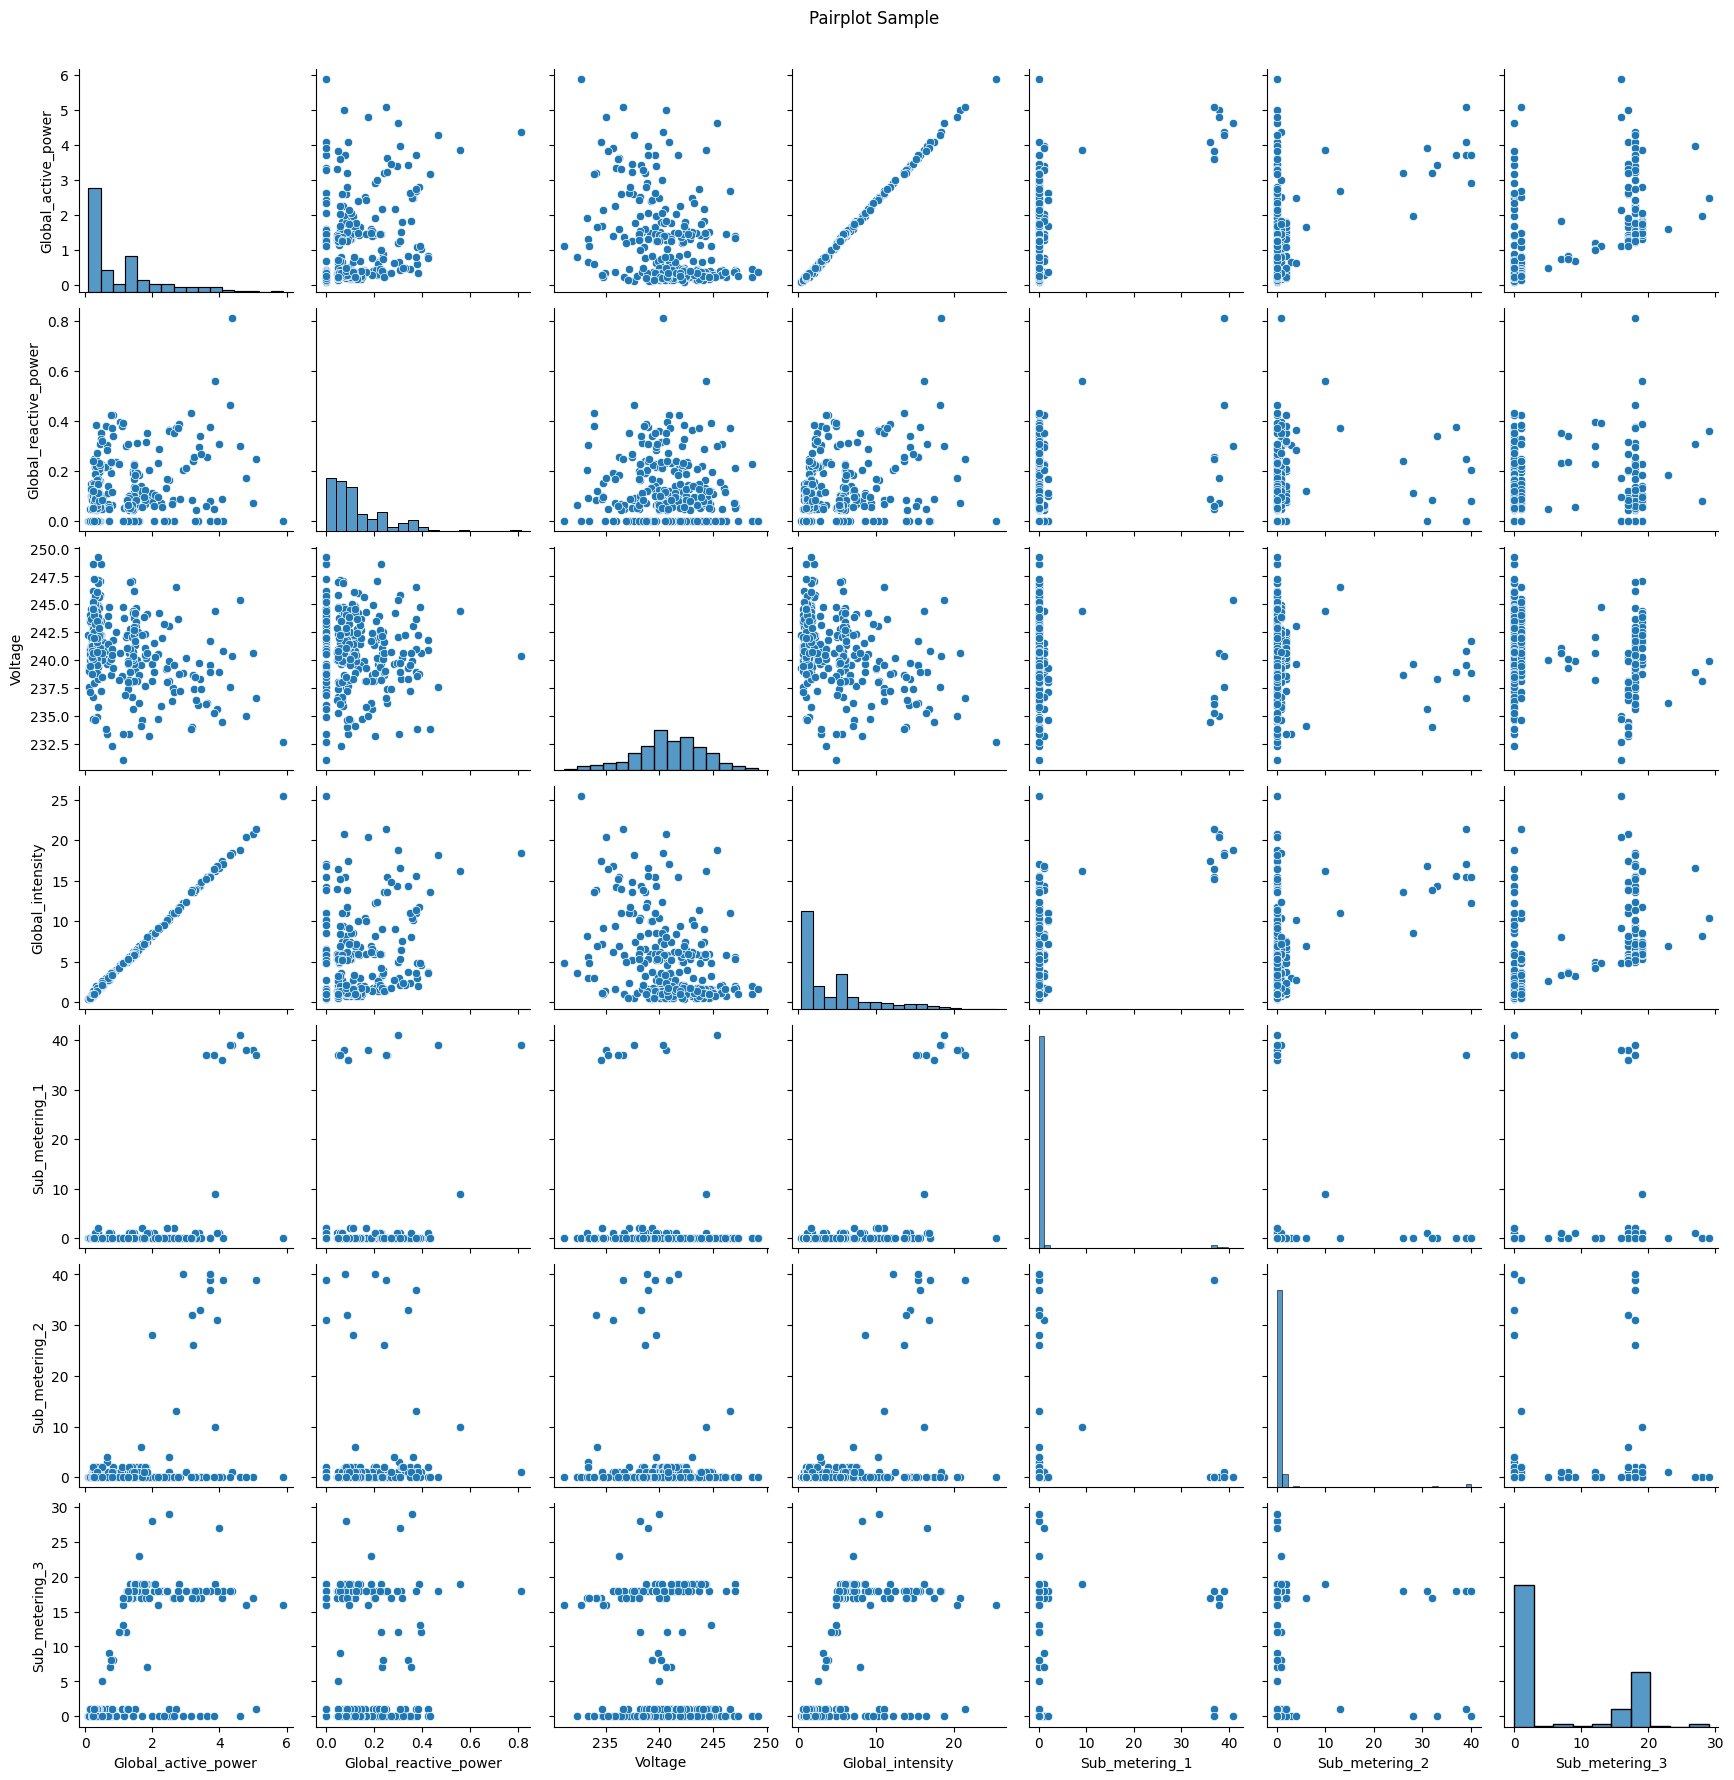

In [14]:
sample_data = energy_data[cols].sample(300, random_state=42)
sns.pairplot(sample_data)
plt.suptitle('Pairplot Sample', y=1.02)
plt.show()

There appears to be a direct correlation between global intensity and global active power. There also seems to be some correlation between global active power/global intensity and each of the sub metering features.

Lets try to see if there are any trends in the data when grouping data together by hour of day

In [15]:
data_hour = energy_data[['Date'] + cols].copy()
data_hour['Hour'] = energy_data['Time'].str[:2].astype(int)
data_hour.head(5)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour
0,16/12/2006,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17
1,16/12/2006,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17
2,16/12/2006,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17
3,16/12/2006,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17
4,16/12/2006,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17


In [16]:
hourly_avg = data_hour.groupby('Hour')[cols].mean()
hourly_avg.head(24)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Hour,,,,,,,
0,0.659434,0.114974,242.401809,2.806901,0.364378,0.555392,2.966651
1,0.539325,0.104968,241.719412,2.312065,0.248958,0.397963,2.351931
2,0.480621,0.105100,242.592898,2.064921,0.145858,0.350133,2.027166
3,0.444866,0.103050,242.684657,1.917526,0.067765,0.350061,1.692080
4,0.443847,0.099586,242.427262,1.911879,0.047142,0.334048,1.866275
5,0.453674,0.096942,242.094522,1.949221,0.035703,0.315693,2.135749
6,0.791600,0.102699,241.941153,3.369913,0.039433,0.334299,4.236972
7,1.502246,0.109976,239.924560,6.323800,0.305204,0.503084,10.743926
8,1.461016,0.110831,239.504684,6.140271,1.371780,1.009836,12.657799


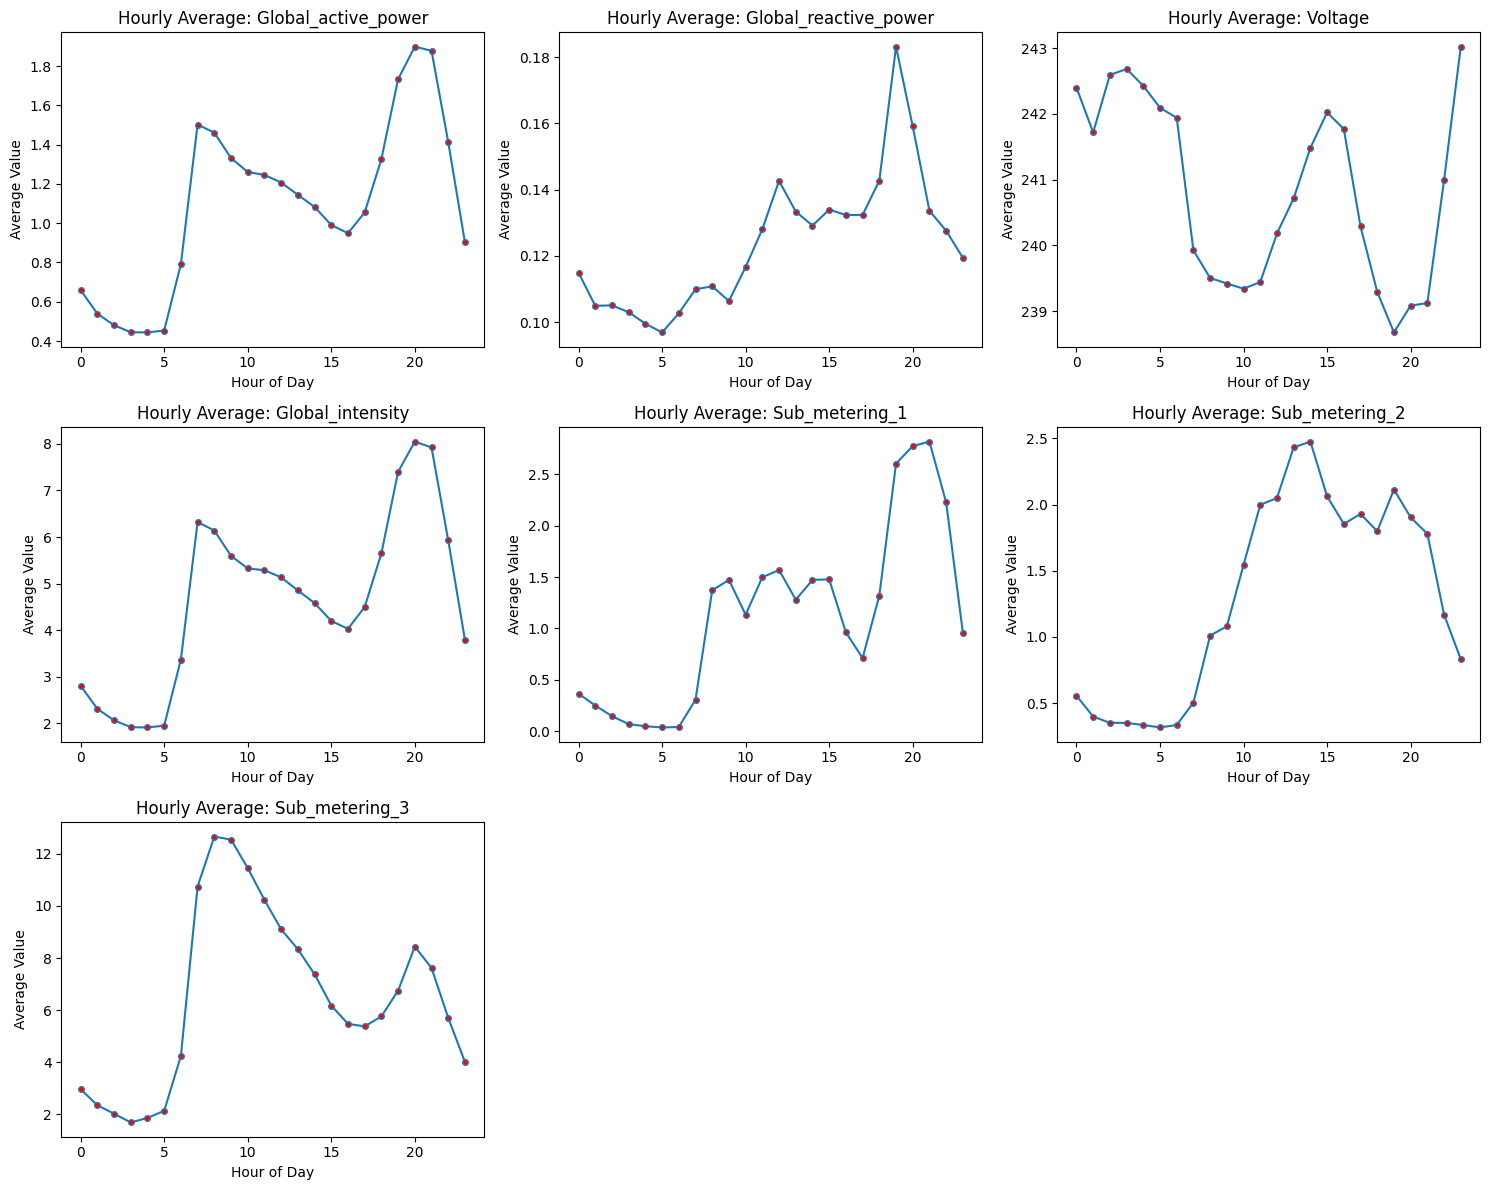

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i in range(len(cols)):
    row = i // 3
    col = i % 3

    hourly_avg[cols[i]].plot(
        ax=axs[row, col], 
        marker='o',
        markersize=4,
        markerfacecolor='red'
    )
    axs[row, col].set_title(f'Hourly Average: {cols[i]}')
    axs[row, col].set_xlabel('Hour of Day')
    axs[row, col].set_ylabel('Average Value')

# Hide empty subplots
axs[2, 1].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

We got some really interesting information from these plots.

**Global Active Power**
- High usage at hours between 6AM to 11PM
- Very large peak in usage between 7PM to 9PM

**Global Reactive Power**
- Steady usage between around 11AM to 10PM
- Big peak at 7PM

**Voltage**
- Big dip between 7AM to 11AM and 6PM to 8PM

**Global Intensity**
- Lowest at round 12AM to 5AM
- Peaks at 8AM to 9AM

**Sub Metering 1**
- Dip between 12AM to 6AM
- Peak between 7PM to 9PM

**Sub Metering 2**
- Dip between 1AM to 6AM
- Peak between 11AM to 9PM

**Sub Metering 3**
- Dip between 1AM to 5AM
- Peak between 8AM to 9AM

**General Observations**
- All features, except for voltage, are lower during hours when people are typically sleeping
- Many features include a peak near 7PM-8PM

Now instead of grouping by hour, lets graph by day of the year.

In [18]:
data_day = energy_data[['Time'] + cols].copy()
data_day['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
data_day = data_day.sort_values('Date')
data_day['DayofYear'] = data_day['Date'].dt.dayofyear
data_day.head(5)

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,DayofYear
0,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,350
269,21:53:00,3.480,0.170,236.46,14.6,0.0,2.0,17.0,2006-12-16,350
268,21:52:00,3.482,0.170,236.40,14.6,0.0,1.0,17.0,2006-12-16,350
267,21:51:00,3.494,0.170,236.28,14.8,0.0,1.0,17.0,2006-12-16,350
266,21:50:00,1.696,0.194,238.19,7.6,0.0,2.0,17.0,2006-12-16,350


In [19]:
daily_avg = data_day.groupby('DayofYear')[cols].mean()
daily_avg.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DayofYear,,,,,,,
1,1.413140,0.098729,241.641859,5.895625,0.960069,1.260938,4.270139
2,1.137296,0.122617,242.935522,4.759160,0.558778,1.694391,5.871505
3,1.132138,0.118825,243.515134,4.747674,1.981250,1.117708,5.546701
4,1.579061,0.115061,242.886307,6.606493,0.650868,3.205903,6.372396
5,1.513957,0.100780,242.167630,6.328819,1.150694,0.222222,8.213715


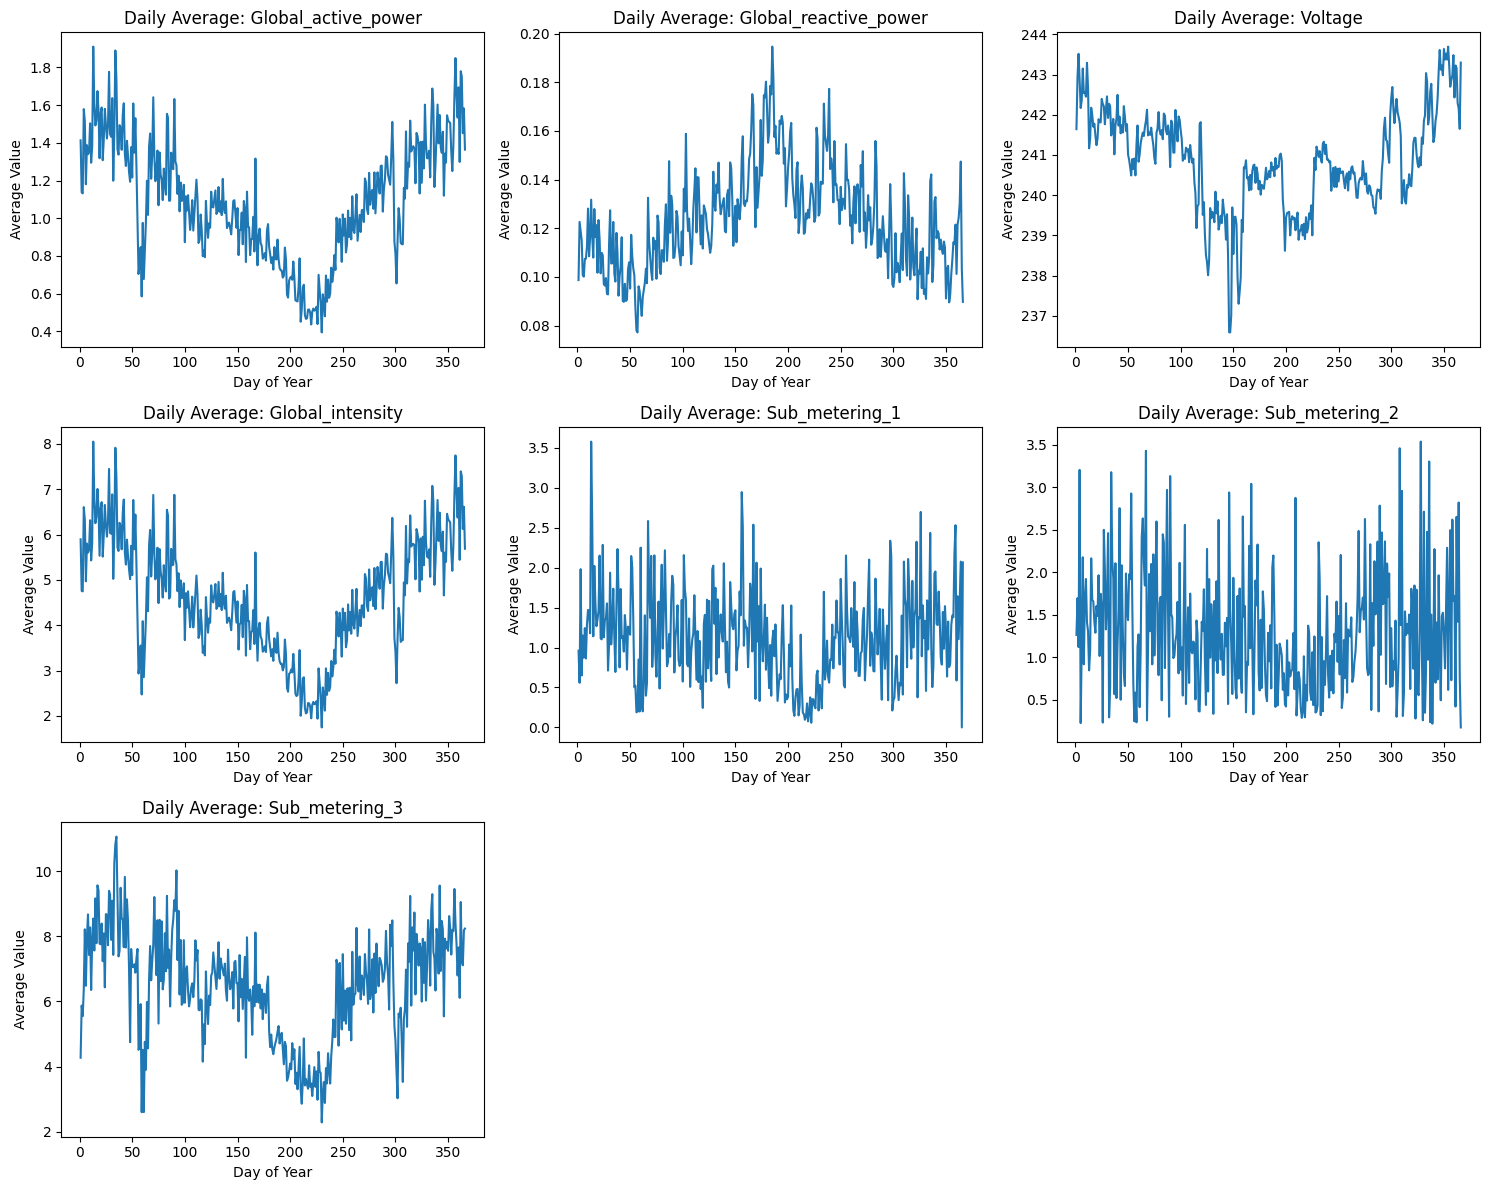

In [20]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i in range(len(cols)):
    row = i // 3
    col = i % 3

    daily_avg[cols[i]].plot(
        ax=axs[row, col]
    )
    axs[row, col].set_title(f'Daily Average: {cols[i]}')
    axs[row, col].set_xlabel('Day of Year')
    axs[row, col].set_ylabel('Average Value')

# Hide empty subplots
axs[2, 1].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

One remark to take a note of is each average is only around 4 years worth of data, meaning it is an average of around 4 days. This is not a lot of data, so unusual usage during one/a few days can heavily influence the total average of that day of year.

Let's see if we can observe any trends in the graphs.

**Global Active Power**
- There appears to be a dip at around July-August

**Global Reactive Power**
- Slowly rises from January to May, then slowly falls from June to December

**Voltage**
- Large dip in May

**Global Intensity**
- Falls from February to August, then slowly rises until January

**Sub Metering 1**
- Stays pretty consistent year around, no apparent trends in the data

**Sub Metering 2**
- Stays pretty consistent year around, no apparent trends in the data

**Sub Metering 3**
- Dips between May to July

Now lets check if there are any trends in the data over time

In [23]:
data_year = energy_data[['Time'] + cols].copy()
data_year['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
data_year = data_day.sort_values('Date')
data_year['Year'] = data_year['Date'].dt.year
data_year.head(5)

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Date,DayofYear,Year
0,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16,350,2006
197,20:41:00,3.254,0.074,234.43,13.8,0.0,0.0,17.0,2006-12-16,350,2006
1,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16,350,2006
2,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16,350,2006
3,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16,350,2006


In [24]:
yearly_avg = data_year.groupby('Year')[cols].mean()
yearly_avg.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Year,,,,,,,
2006,1.901295,0.131386,241.441125,8.029956,1.248636,2.214987,7.409558
2007,1.117008,0.117365,239.383892,4.764500,1.231716,1.637743,5.794556
2008,1.072097,0.117109,240.626429,4.551975,1.109847,1.256213,6.033701
2009,1.078637,0.131408,241.894334,4.555024,1.136839,1.135857,6.822712
2010,1.061000,0.129428,241.515526,4.478424,0.987521,1.101696,7.244024


**VERY important note about the data:**
- 2006 only inlcudes a few days. Our dataset starts off on December 16th, 2006. Ignore the 2006 data above.
- 2010 is also incomplete. Our dataset ends on November 26th, 2010. So we have approximately 11/12 month of complete data for 2010. 

**Observations**
- Global active power, global reactive power, voltage, global intensity, and sub metering 1 seems to stay consistent.
- Sub metering 2 seems to be trending down, while sub metering 3 seems to be trending up. Since our sample size is so small, I would only take note of these observations.